# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

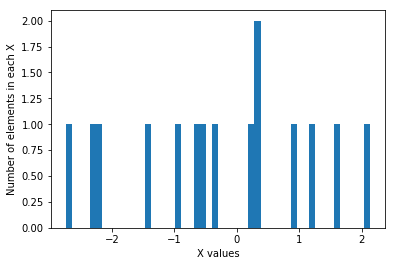

In [2]:
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

В коде 15 элементов сумм.

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

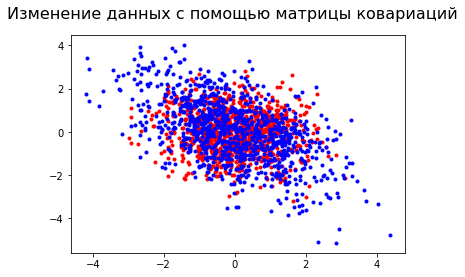

In [3]:
import numpy.linalg as la
n = 1000
C = [[2, -1], [-1, 2]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

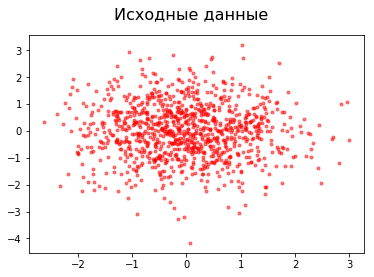

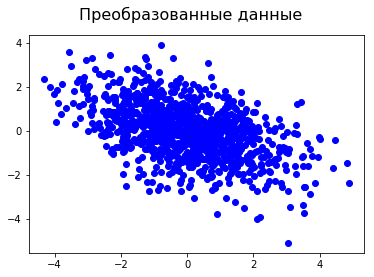

In [4]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2,-1],[-1,2]]
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [5]:
theta = (90 + 45) * 3.14 / 180
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = u.T*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  3.0037627378466922
теоритический подсчет:  [[2.99999715]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

Сгенерированные данные достаточно хорошо аппроксемируют теоретический подсчет.

Посчитать как меняется вариация в зависимости от выбора собственного вектора

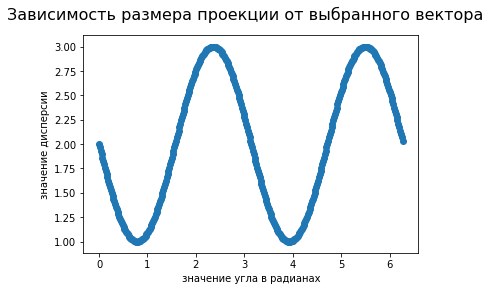

In [6]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Работа с данными данные

Загрузить таблицу. 

In [7]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


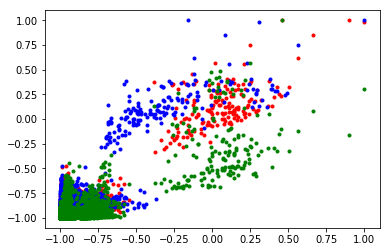

In [9]:
x_4046 = df_norm[0]
x_4225 = df_norm[1]
x_4770 = df_norm[2]
plt.plot(x_4046, x_4225, 'r.')
plt.plot(x_4770, x_4225, 'b.')
plt.plot(x_4046, x_4770, 'g.')

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [12]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

X = np.vstack((x_4046, x_4225, x_4770))

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[9.20855421e-06, 7.54877046e-06],
       [7.54877046e-06, 6.18838099e-06]])

# Поиск собственного вектора

1.5396798398024772e-05 [0.77335557 0.63397253]


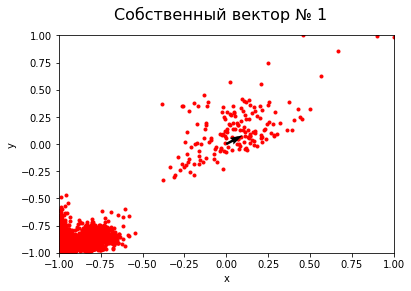

1.3680042672745536e-10 [-0.63397253  0.77335557]


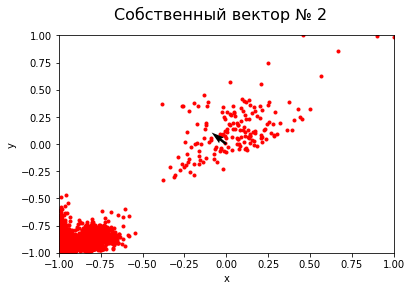

In [13]:
import numpy.linalg as la
n = 1000
Cb = cov_mat(X.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X[0,:], X[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

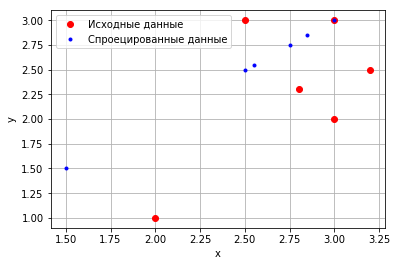

In [14]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = [[0.5, 0.5], [0.5, 0.5]]
Xp = np.dot(Xc, P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

In [15]:
x_100 = np.random.randint(low=1, high=7, size=100)
x_100

array([1, 2, 6, 1, 3, 6, 3, 4, 6, 6, 6, 3, 3, 1, 6, 5, 1, 1, 6, 6, 1, 5,
       2, 5, 4, 2, 1, 6, 6, 4, 3, 4, 3, 1, 3, 5, 3, 6, 5, 2, 1, 1, 5, 3,
       4, 3, 6, 6, 6, 5, 5, 1, 1, 1, 3, 3, 1, 1, 6, 5, 2, 1, 2, 4, 3, 5,
       3, 1, 3, 3, 1, 4, 1, 5, 2, 6, 2, 5, 4, 3, 5, 6, 6, 3, 4, 1, 4, 6,
       6, 2, 3, 5, 2, 6, 3, 2, 4, 2, 5, 3])

(array([20., 12., 21., 11., 15., 21.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

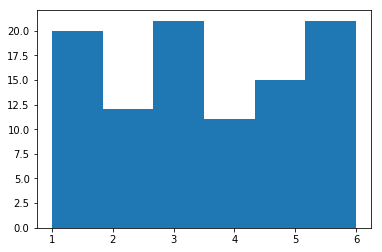

In [16]:
plt.hist(x_100, bins=6)

(array([16764., 16654., 16615., 16666., 16616., 16685.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

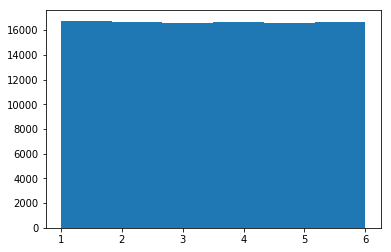

In [18]:
x_100000 = np.random.randint(low=1, high=7, size=100000)
plt.hist(x_100000, bins=6)